In [1]:
# bibiliotecas de manipulação de dados
import pandas as pd

In [2]:
# bibliotecas de visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# carregar os dados
# data set original em https://archive.ics.uci.edu/ml/datasets/Audit+Data
df = pd.read_csv('../data/trial.csv', sep=',')

In [4]:
# verificar o tamanho do dataset
df.shape

(776, 18)

In [5]:
# visualizar o dataset
df.head()

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
0,3.89,23,4.18,6,2.50,2,6.68,5.0,2,3.38,2,2,0,2,0,2,2.4,1
1,3.89,6,0.00,2,4.83,2,4.83,5.0,2,0.94,2,2,0,2,0,2,2.0,0
2,3.89,6,0.51,2,0.23,2,0.74,5.0,2,0.00,2,2,0,2,0,2,2.0,0
3,3.89,6,0.00,2,10.80,6,10.80,6.0,6,11.75,6,2,0,2,0,2,4.4,1
4,3.89,6,0.00,2,0.08,2,0.08,5.0,2,0.00,2,2,0,2,0,2,2.0,0


In [6]:
# visualizar atributos e seus tipos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sector_score   776 non-null    float64
 1   LOCATION_ID    776 non-null    object 
 2   PARA_A         776 non-null    float64
 3   SCORE_A        776 non-null    int64  
 4   PARA_B         776 non-null    float64
 5   SCORE_B        776 non-null    int64  
 6   TOTAL          776 non-null    float64
 7   numbers        776 non-null    float64
 8   Marks          776 non-null    int64  
 9   Money_Value    775 non-null    float64
 10  MONEY_Marks    776 non-null    int64  
 11  District       776 non-null    int64  
 12  Loss           776 non-null    int64  
 13  LOSS_SCORE     776 non-null    int64  
 14  History        776 non-null    int64  
 15  History_score  776 non-null    int64  
 16  Score          776 non-null    float64
 17  Risk           776 non-null    int64  
dtypes: float64

In [7]:
# verificar a quantidade de ocorrências por valor existem
df['LOCATION_ID'].value_counts().sort_index()

1          11
11         26
12         47
13         35
14         20
15         35
16         52
17          1
18         16
19         68
2          41
20          5
21          8
22         24
23          1
24          1
25          6
27          8
28          8
29         21
3           3
30          4
31         12
32         29
33          1
34          1
35          2
36          4
37         10
38          4
39          9
4          37
40          3
41          1
42          1
43          7
44          1
5          44
6          33
7           4
8          76
9          53
LOHARU      1
NUH         1
SAFIDON     1
Name: LOCATION_ID, dtype: int64

In [8]:
# transformar os dados em numéricos
df['LOCATION_ID'] = pd.to_numeric(df['LOCATION_ID'], errors='coerce')
df['LOCATION_ID']

0      23.0
1       6.0
2       6.0
3       6.0
4       6.0
       ... 
771     9.0
772    16.0
773    14.0
774    18.0
775    15.0
Name: LOCATION_ID, Length: 776, dtype: float64

In [9]:
# verificar atributos com valores ausentes
df.isnull().sum(axis = 0)

Sector_score     0
LOCATION_ID      3
PARA_A           0
SCORE_A          0
PARA_B           0
SCORE_B          0
TOTAL            0
numbers          0
Marks            0
Money_Value      1
MONEY_Marks      0
District         0
Loss             0
LOSS_SCORE       0
History          0
History_score    0
Score            0
Risk             0
dtype: int64

In [10]:
# verificar instâncias com valores ausentes
df.isnull().sum(axis = 1)

0      0
1      0
2      0
3      0
4      0
      ..
771    0
772    0
773    0
774    0
775    0
Length: 776, dtype: int64

In [11]:
# visualizar só as instâncias que tem valores ausentes
df[df.isnull().sum(axis = 1) != 0]

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
351,1.99,NaN,0.30,2,0.0,2,0.30,5.0,2,0.00,2,2,0,2,0,2,2.0,0
355,1.99,NaN,0.55,2,0.0,2,0.55,5.0,2,0.67,2,2,0,2,0,2,2.0,0
367,1.99,NaN,0.48,2,0.0,2,0.48,5.0,2,0.47,2,2,0,2,0,2,2.0,0
642,55.57,4.0,0.23,2,0.0,2,0.23,5.0,2,NaN,2,2,0,2,0,2,2.0,0


In [12]:
# substituir valores ausentes de 'LOCATION_ID'
df['LOCATION_ID'] = df['LOCATION_ID'].fillna(-1)

In [13]:
# verificar a substituição
print(df['LOCATION_ID'].iloc[351])
print(df['LOCATION_ID'].iloc[355])
print(df['LOCATION_ID'].iloc[367])

-1.0
-1.0
-1.0


In [14]:
# substituir valores ausentes de 'Money_Value'
df['Money_Value'] = df['Money_Value'].where(pd.notna(df['Money_Value']), df['Money_Value'].mean())

In [15]:
# verificar a substituição
print(df['Money_Value'].iloc[642])
print(df['Money_Value'].iloc[642] == df['Money_Value'].mean())

14.13763096774195
True


In [16]:
# verificar o balanceamento dos dados
df['Risk'].value_counts(normalize=True)

1    0.626289
0    0.373711
Name: Risk, dtype: float64

In [17]:
# visualizar estatísticas descritivas
df.describe()

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000
mean,20.184536,14.795103,2.450194,3.512887,10.799988,3.131443,13.218481,5.067655,2.237113,14.137631,2.909794,2.505155,0.029639,2.061856,0.104381,2.167526,2.702577,0.626289
std,24.319017,9.921136,5.678870,1.740549,50.083624,1.698042,51.312829,0.264449,0.803517,66.563533,1.597452,1.228678,0.184280,0.375080,0.531031,0.679869,0.858923,0.484100
min,1.850000,-1.000000,0.000000,2.000000,0.000000,2.000000,0.000000,5.000000,2.000000,0.000000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.000000,0.000000
25%,2.370000,8.000000,0.210000,2.000000,0.000000,2.000000,0.537500,5.000000,2.000000,0.000000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.000000,0.000000
50%,3.890000,13.000000,0.875000,2.000000,0.405000,2.000000,1.370000,5.000000,2.000000,0.095000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.400000,1.000000
75%,55.570000,19.000000,2.480000,6.000000,4.160000,4.000000,7.707500,5.000000,2.000000,5.630000,4.000000,2.000000,0.000000,2.000000,0.000000,2.000000,3.250000,1.000000
max,59.850000,44.000000,85.000000,6.000000,1264.630000,6.000000,1268.910000,9.000000,6.000000,935.030000,6.000000,6.000000,2.000000,6.000000,9.000000,6.000000,5.200000,1.000000


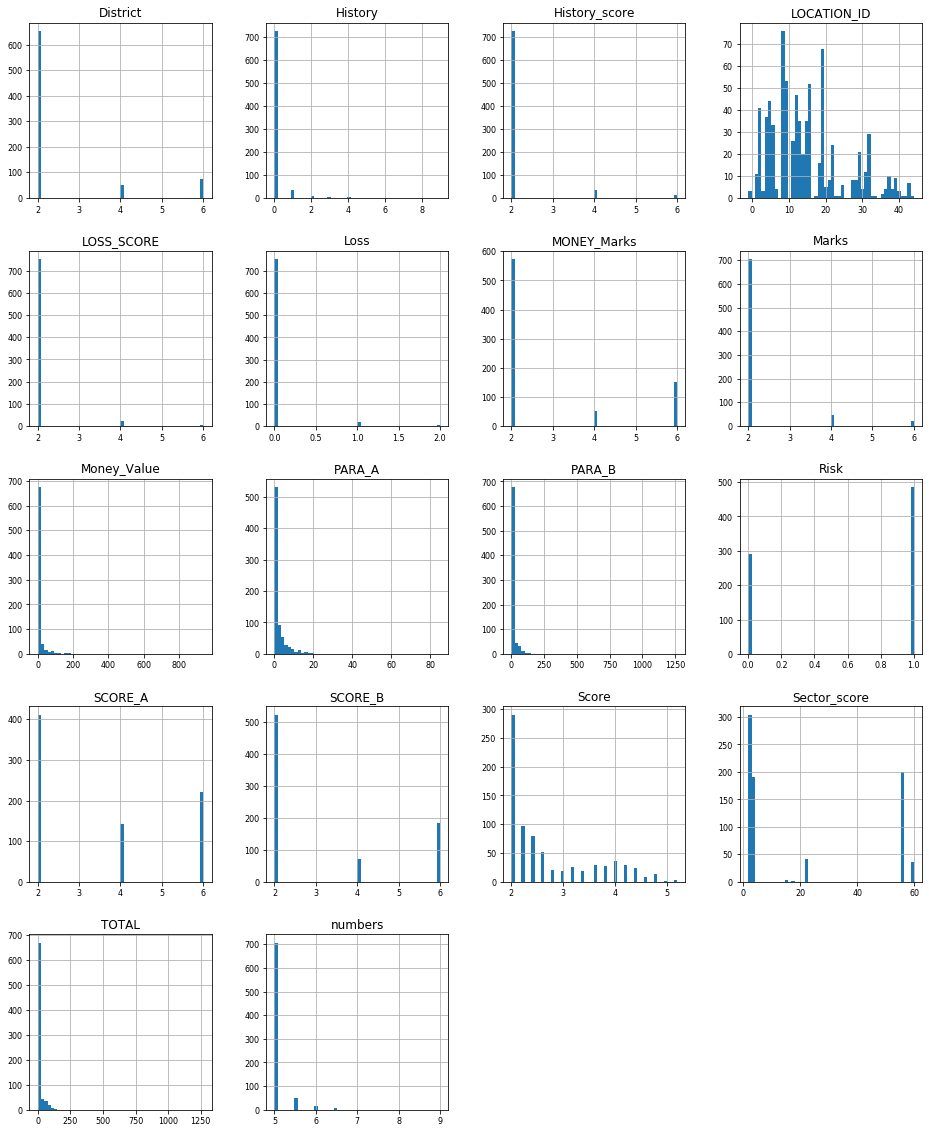

In [18]:
# visualizar distribuição das variáveis
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

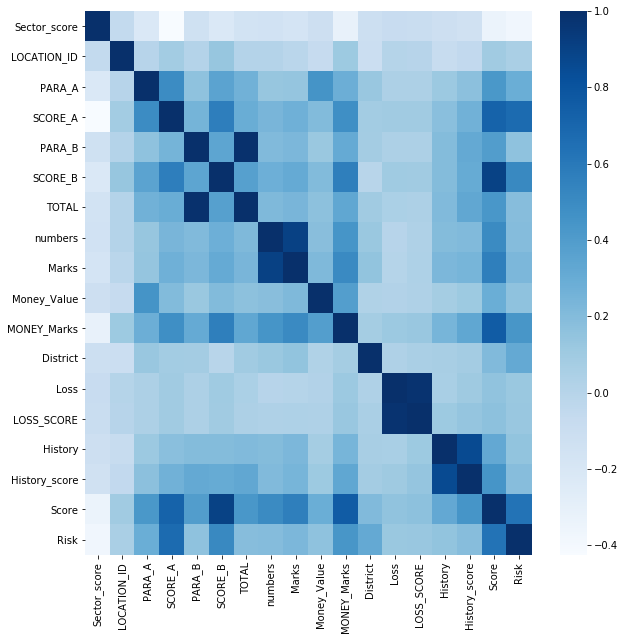

In [19]:
# visualizar correlação entre as variáveis
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), cmap='Blues');

In [20]:
# verificar a correlação entre as variáveis e a variável alvo
df.corr()['Risk'][:-1].sort_values(ascending=False)

SCORE_A          0.671863
Score            0.632268
SCORE_B          0.515045
MONEY_Marks      0.440226
District         0.317795
PARA_A           0.292425
Marks            0.228098
numbers          0.197750
TOTAL            0.190793
History_score    0.190466
PARA_B           0.162807
Money_Value      0.160543
History          0.151937
LOSS_SCORE       0.127472
Loss             0.124322
LOCATION_ID      0.056306
Sector_score    -0.374588
Name: Risk, dtype: float64

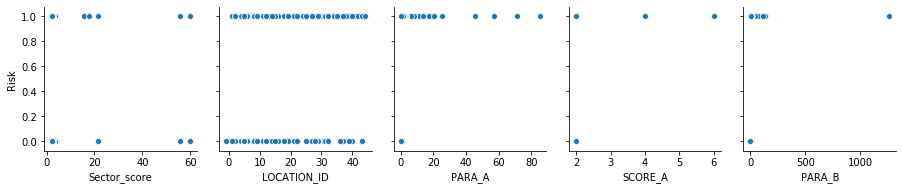

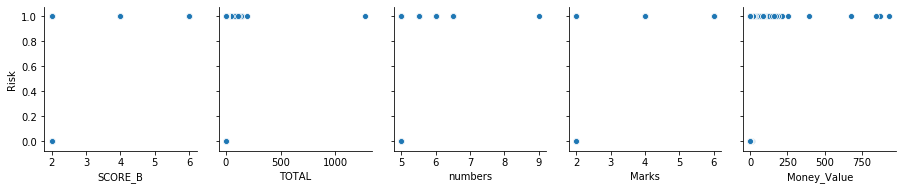

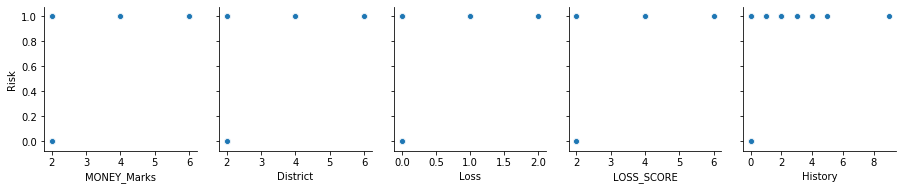

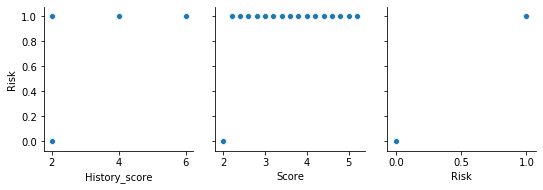

In [21]:
# visualizar a correlação entre as variáveis e a variável alvo
for i in range(0, len(df.columns), 5):
    sns.pairplot(data=df, x_vars=df.columns[i:i+5], y_vars=['Risk'])

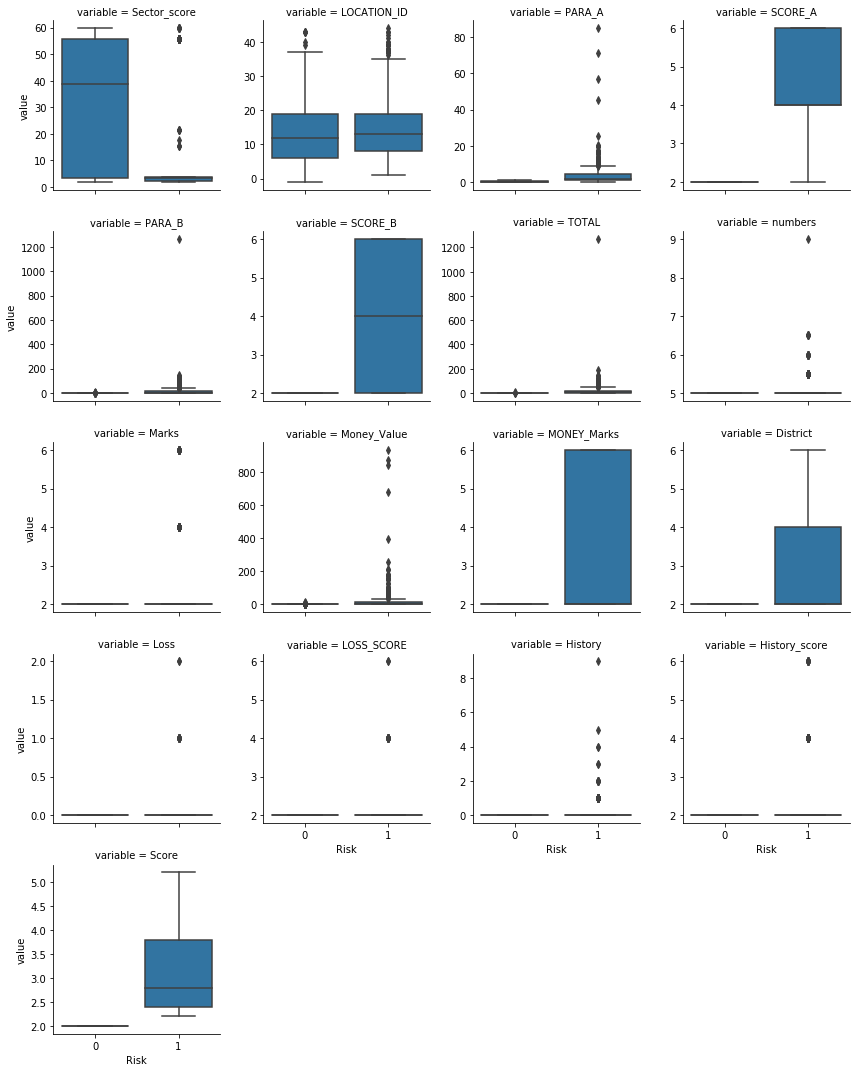

In [22]:
# visualizar a distribuição dos dados para cada variável
df_melt = df.melt(id_vars=['Risk'])
grid = sns.axisgrid.FacetGrid(df_melt[df_melt.variable.isin(df.columns)], col='variable', col_wrap=4, sharey=False)
grid.map(sns.boxplot, 'Risk','value', order=None);